In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression

In [181]:
df = pd.read_csv('/home/gueneau/PycharmProjects/Analyse_Titanic/countries_indicators.csv')

## We know that HDI is computed from GDP per habita but are there factors linked to that GDP/habita ? 


In [182]:
print(df.columns.values)

['Country' 'Year' 'Population (Million)' 'Continent' 'GDP (Millions $)'
 'GDP (Billions $)' 'GDP per capita ($)' 'Public spending (%GDP)'
 'Area (km2)' 'Tax rate (% GDP)' 'Public debt (% GDP)' 'IDH']


In [183]:
df.head()

,Country,Year,Population (Million),Continent,GDP (Millions $),GDP (Billions $),GDP per capita ($),Public spending (%GDP),Area (km2),Tax rate (% GDP),Public debt (% GDP),IDH
0,AUS,2019,25.365745,Oceania,1346385.112,1346.385112,53078.871210,43.705520,7682300.0,NaN,75.87409,0.939
1,AUT,2019,8.877637,Europe,520729.751,520.729751,58656.346390,48.422406,82580.0,42.444,89.13332,0.908
2,BEL,2019,11.462023,Europe,630953.518,630.953518,55047.308664,51.839789,30280.0,42.916,119.72890,0.931
3,CAN,2019,37.593384,America,1904502.917,1904.502917,50660.587432,NaN,8965590.0,33.455,106.68080,0.929
4,CZE,2019,10.669324,Europe,462266.205,462.266205,43326.662964,41.009590,77270.0,34.927,37.46101,0.900


In [184]:
### Rename the features 
### We can see that some features names may be with parenthesis or % characters we are simply going to rename them.
# We can also remove the Year column since it won't be of any use in the further analysis

df.rename(columns={"Population (Million)":"population",df.columns[5]:"GDP",df.columns[6]:"GDP_per_capita",df.columns[7]:"public_spending",df.columns[8]:"area",df.columns[9]:"tax_rate",df.columns[10]:"public_debt","IDH":"HDI"},inplace=True)
df.drop(['Year'],axis=1)

,Country,population,Continent,GDP (Millions $),GDP,GDP_per_capita,public_spending,area,tax_rate,public_debt,HDI
0,AUS,25.365745,Oceania,1.346385e+06,1346.385112,53078.871210,43.705520,7682300.0,NaN,75.87409,0.939
1,AUT,8.877637,Europe,5.207298e+05,520.729751,58656.346390,48.422406,82580.0,42.444,89.13332,0.908
2,BEL,11.462023,Europe,6.309535e+05,630.953518,55047.308664,51.839789,30280.0,42.916,119.72890,0.931
3,CAN,37.593384,America,1.904503e+06,1904.502917,50660.587432,NaN,8965590.0,33.455,106.68080,0.929
4,CZE,10.669324,Europe,4.622662e+05,462.266205,43326.662964,41.009590,77270.0,34.927,37.46101,0.900
5,DNK,5.814461,Europe,3.482639e+05,348.263937,59896.168708,49.605101,42430.0,46.337,48.12441,0.940
6,FIN,5.521605,Europe,2.844806e+05,284.480553,51521.351672,53.297501,304590.0,42.189,69.84094,0.938
7,FRA,67.215667,Europe,3.336887e+06,3336.886582,49644.476220,55.297450,547567.0,45.401,123.08800,0.901
8,DEU,83.092958,Europe,4.676884e+06,4676.884224,56284.964894,44.858422,348950.0,38.812,67.50011,0.947
9,GRC,10.721584,Europe,3.306719e+05,330.671919,30841.703894,47.492390,128900.0,38.707,200.87770,0.888


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           52 non-null     object 
 1   Year              52 non-null     int64  
 2   population        51 non-null     float64
 3   Continent         51 non-null     object 
 4   GDP (Millions $)  50 non-null     float64
 5   GDP               52 non-null     float64
 6   GDP_per_capita    49 non-null     float64
 7   public_spending   32 non-null     float64
 8   area              51 non-null     float64
 9   tax_rate          34 non-null     float64
 10  public_debt       42 non-null     float64
 11  HDI               51 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 5.0+ KB


In [186]:
df.describe()

,Year,population,GDP (Millions $),GDP,GDP_per_capita,public_spending,area,tax_rate,public_debt,HDI
count,52.0,51.000000,5.000000e+01,52.000000,49.000000,32.000000,5.100000e+01,34.000000,42.000000,51.000000
mean,2019.0,94.770585,3.194059e+06,3116.128215,43991.429174,42.341501,1.491716e+06,34.557618,77.518964,0.880569
std,0.0,274.346139,9.743960e+06,9560.381246,19420.067138,7.164753,3.340036e+06,7.041261,46.287836,0.063439
min,2019.0,0.360558,2.168163e+04,21.681631,12482.798834,24.482076,3.200000e+02,19.677000,13.605800,0.709000
25%,2019.0,5.401020,1.893006e+05,212.200370,32002.671089,39.264537,4.958000e+04,30.655750,47.019750,0.851000
50%,2019.0,10.721584,5.447707e+05,544.770743,42861.476117,42.551173,1.289000e+05,34.886000,63.173990,0.895000
75%,2019.0,55.218413,1.966916e+06,1967.497447,53078.871210,47.724894,6.455495e+05,39.305250,102.293930,0.931000
max,2019.0,1433.783692,6.332841e+07,63328.406205,119415.146378,55.297450,1.638134e+07,46.337000,233.385900,0.957000


In [187]:
### Cleaning the dataset ### 

##- Checking missing values: 
null_values = df.isnull().sum().sort_values(ascending=False)
percent = null_values/df.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([null_values,percent],axis=1,keys=['total','percent'])
print(null_values)
print(missing_data)

### Filling missing values 







public_spending     20
tax_rate            18
public_debt         10
GDP_per_capita       3
GDP (Millions $)     2
population           1
Continent            1
area                 1
HDI                  1
Country              0
Year                 0
GDP                  0
dtype: int64
                  total   percent
public_spending      20  0.384615
tax_rate             18  0.346154
public_debt          10  0.192308
GDP_per_capita        3  0.057692
GDP (Millions $)      2  0.038462
population            1  0.019231
Continent             1  0.019231
area                  1  0.019231
HDI                   1  0.019231
Country               0  0.000000
Year                  0  0.000000
GDP                   0  0.000000


In [188]:
### Are smaller countries more likely to have a GDP per habita higher ?
df  = df[(df['Area (km2)']<100000)]
ax = df.plot(kind='scatter',x='Area (km2)',y='GDP per capita ($)')
df[['Area (km2)','GDP per capita ($)','Country']].apply(lambda row: ax.text(*row),axis=1);
plt.axhline(y=43991, color='r', linestyle='-')



KeyError: 'Area (km2)'

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


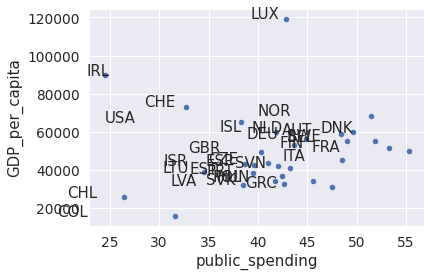

posx and posy should be finite values
posx and posy should be finite values


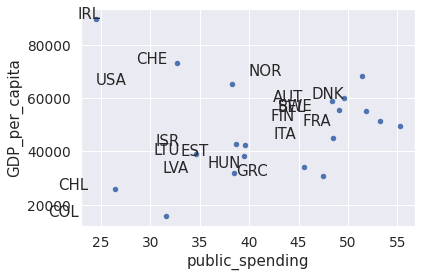

In [189]:
### Is public spending preponderant ?
df = df[df['public_spending'].notna()]
ax = df.plot(kind='scatter',x='public_spending',y='GDP_per_capita')
df[['tax_rate','GDP_per_capita','Country']].apply(lambda row: ax.text(*row),axis=1);


## 10 vs 10 
df_high = df.nlargest(10,'public_spending')
df_low = df.nsmallest(10,'public_spending')
df_tot = pd.concat([df_high,df_low],axis=0)
ax1 = df_tot.plot(kind='scatter',x='public_spending',y='GDP_per_capita')
df_tot[['tax_rate','GDP_per_capita','Country']].apply(lambda row: ax1.text(*row),axis=1);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


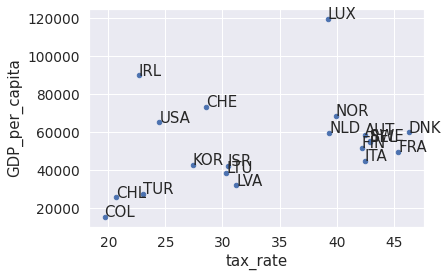

In [166]:
### Is tax rate preponderant ?
#df_filter = df[(df['Continent']=='Europe')]
#ax = df_filter.plot(kind='scatter',x='tax_rate',y='GDP_per_capita')
#df[['tax_rate','GDP_per_capita','Country']].apply(lambda row: ax.text(*row),axis=1);

### 10 lowest tax rates vs 10 highest tax_rates
df_high = df.nlargest(10,'tax_rate')
df_low = df.nsmallest(10,'tax_rate')
df_tot = pd.concat([df_high,df_low],axis=0)
ax = df_tot.plot(kind='scatter',x='tax_rate',y='GDP_per_capita')
df_tot[['tax_rate','GDP_per_capita','Country']].apply(lambda row: ax.text(*row),axis=1);


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


,Country,public_spending,tax_rate
12,IRL,24.482076,22.656
25,CHE,32.703213,28.529
40,LTU,34.585642,30.337
39,LVA,38.448979,31.201
32,EST,39.465546,33.073
27,GBR,40.327178,32.983
4,CZE,41.009590,34.927
20,POL,41.728389,35.385
17,NLD,41.869738,39.333
23,ESP,42.064571,34.649


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


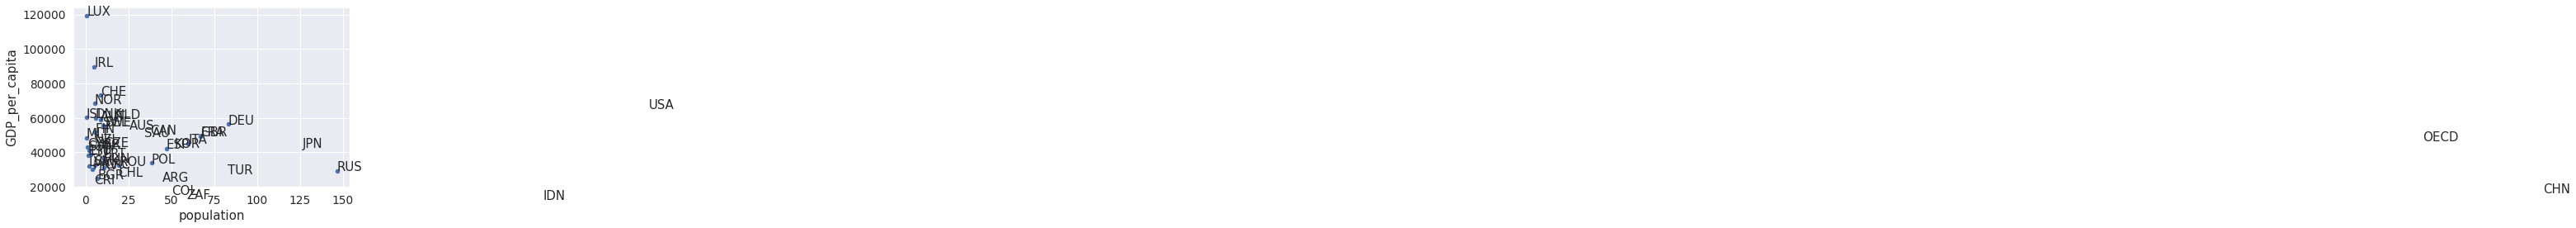

In [154]:
## What about the population ? 
df_filter = df[(df['population']<400) & (df["Continent"] == 'Europe')]
ax = df_filter.plot(kind='scatter',x='population',y='GDP_per_capita')
df[['population','GDP_per_capita','Country']].apply(lambda row: ax.text(*row),axis=1);
df_filter.loc[:,['Country','public_spending','tax_rate']].sort_values(by='public_spending')

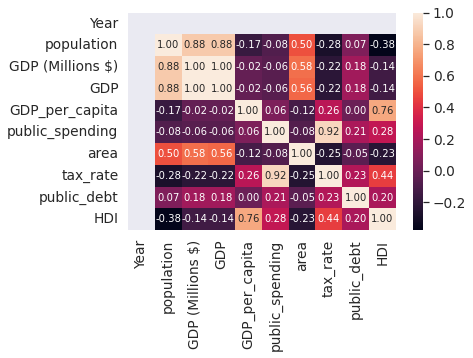

In [133]:
## Pearson correlations 
corrs = df.corr()
ax = sns.heatmap(corrs,annot=True,fmt='.2f', annot_kws={'size': 10})



/home/gueneau/.pyenv/versions/anaconda3-5.3.1/envs/data_science_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


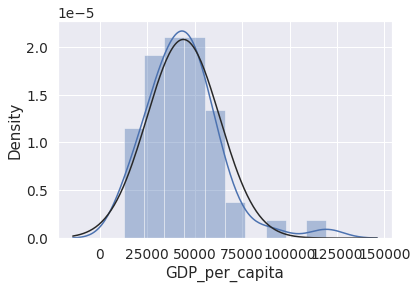

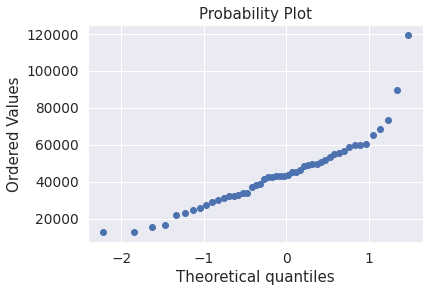

In [123]:
sns.distplot(df['GDP_per_capita'],fit = norm);
fig = plt.figure()
res = stats.probplot(df['GDP_per_capita'], plot=plt)
